In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [36]:
start = '2012-01-01'
end = None
stock = 'GOOG'

data = yf.download(stock,start,end)

C:\Users\ayush\AppData\Local\Temp\ipykernel_14720\2252167320.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [37]:
data.reset_index(inplace=True)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981


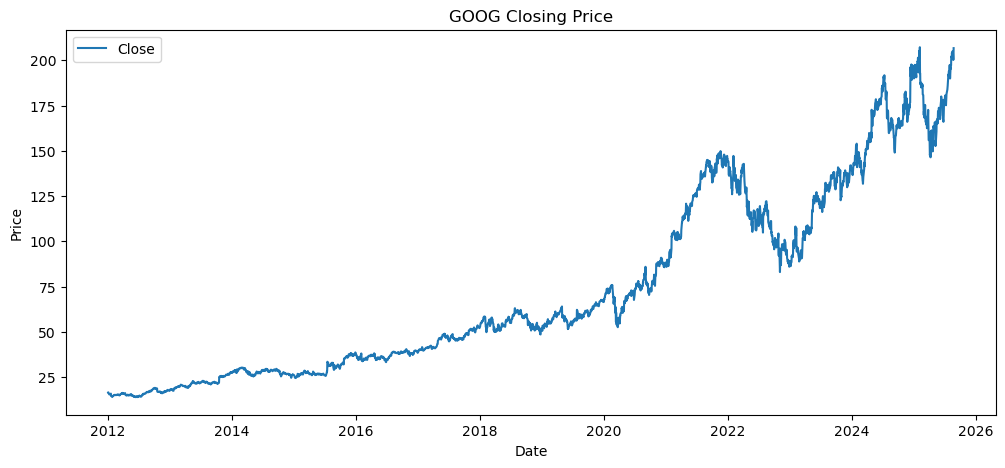

In [38]:
plt.figure(figsize=(12,5))
plt.plot(data.Date, data['Close'], label='Close')
plt.title(f"{stock} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

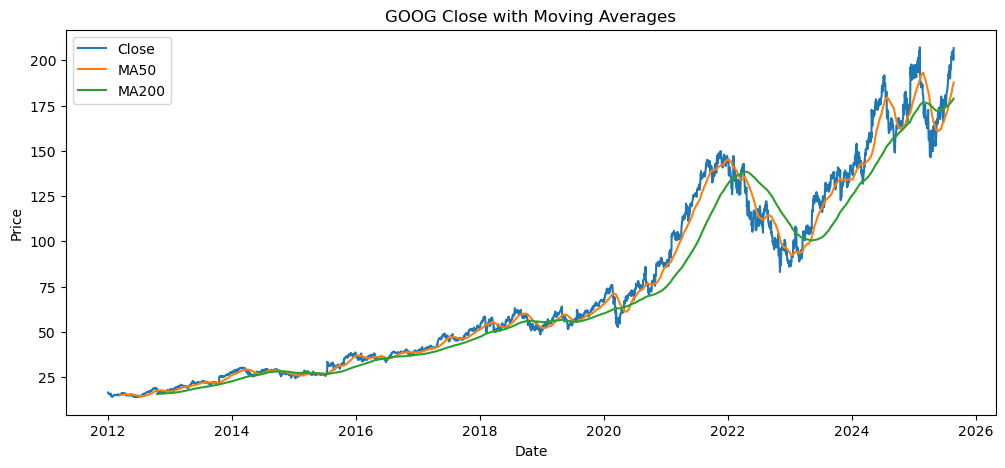

In [39]:
ma_50_days = data['Close'].rolling(50).mean()
ma_200_days = data['Close'].rolling(200).mean()

plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], ma_50_days, label='MA50')
plt.plot(data['Date'], ma_200_days, label='MA200')
plt.title(f"{stock} Close with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [40]:
data.dropna(inplace=True)

In [41]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [42]:
print(data_train.shape[0])
print(data_test.shape[0])

2744
686


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
data_train_scale = scaler.fit_transform(data_train)

In [45]:
data_train_scale

array([[0.01936668],
       [0.01988926],
       [0.01820132],
       ...,
       [0.6097597 ],
       [0.6206527 ],
       [0.61173353]], shape=(2744, 1))

In [46]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [47]:
x, y = np.array(x), np.array(y)

In [48]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0195
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0061
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0048
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0050
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0046
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0039
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0040
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0038
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0041
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0041
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0036
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0042
Epoch 13/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0039
Epoch 14/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0037
Epoch 15/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0037
Epoc

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
pas_100_days = data_train.tail(100)

In [54]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [55]:
data_test_scale  =  scaler.fit_transform(data_test)

In [56]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step 


In [58]:
scale = 1/scaler.scale_
scale

array([124.22789001])

In [59]:
y_predict = y_predict*scale

In [60]:
y = y*scale

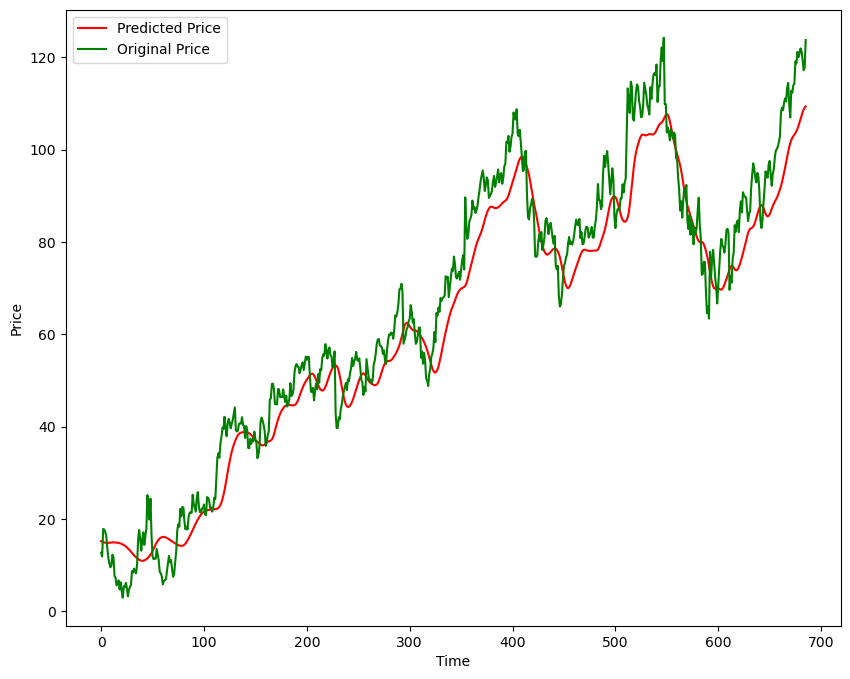

In [61]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
model.save('Stock Prediction Model1.keras')